# `vizkit`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator
import toolz

from onekit import pythonkit as pk
from onekit import optfunckit as ofk
from onekit import scipykit as sck
from onekit import vizkit as vk
from onekit.scipykit import BetaParams

## `plot_beta_distribution`

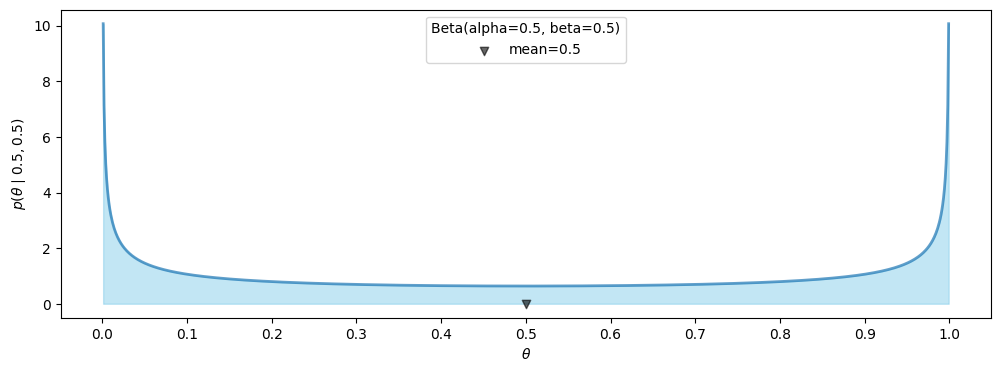

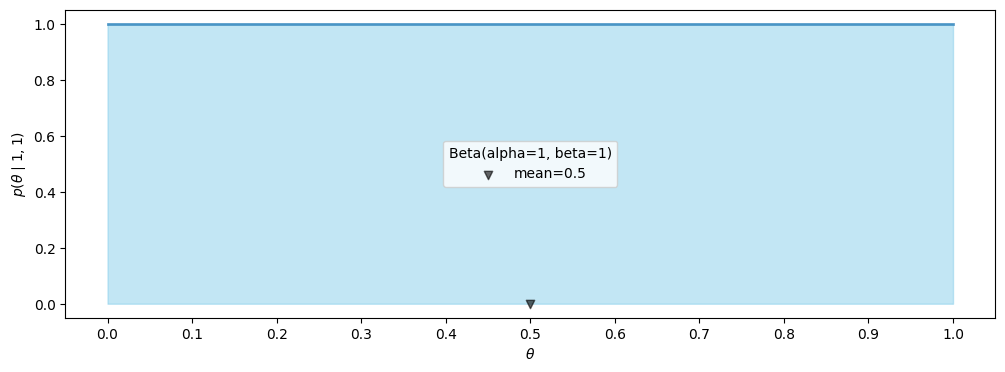

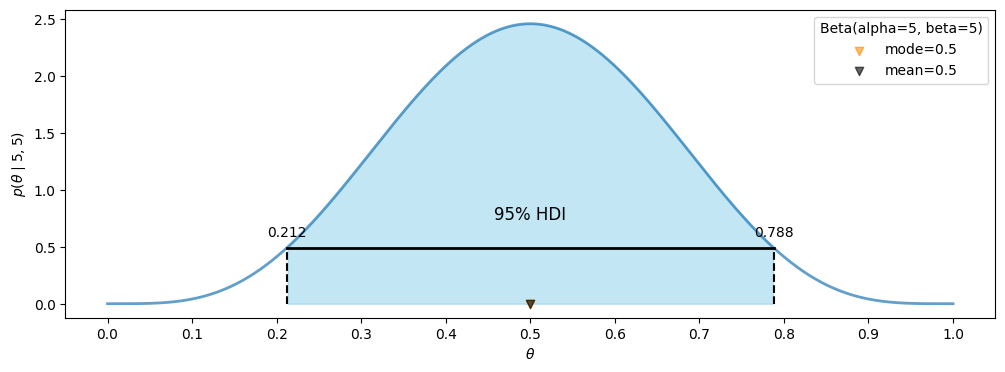

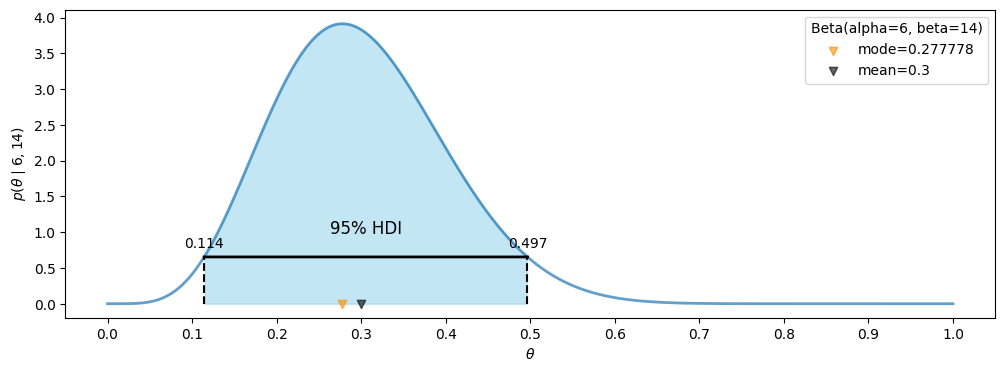

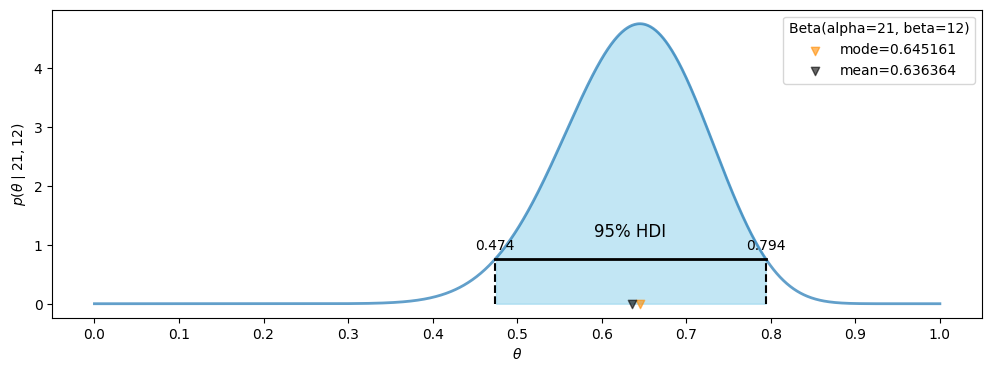

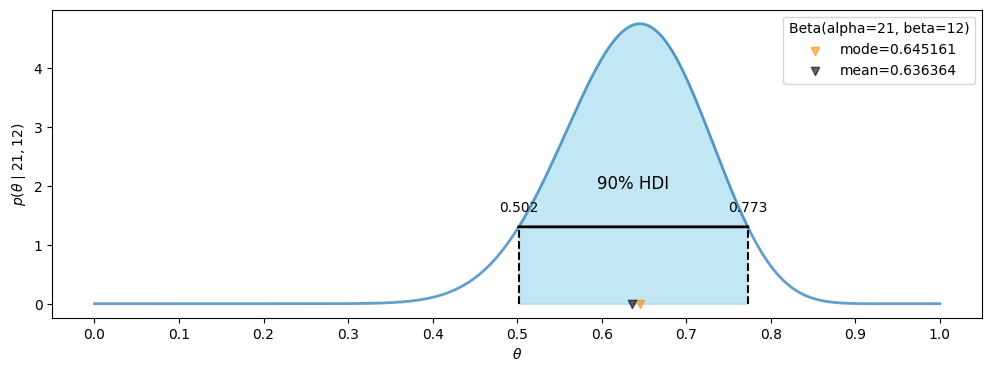

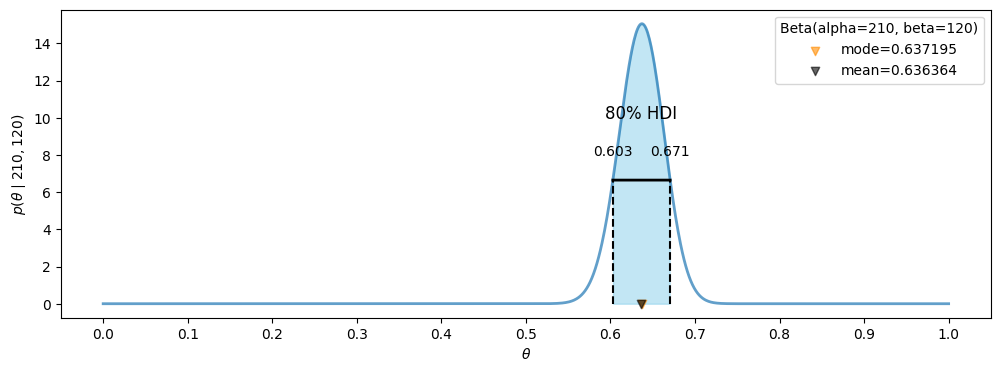

In [2]:
for alpha, beta, hdi_prob in [
    (0.5, 0.5, 0.95),
    (1, 1, 0.95),
    (5, 5, 0.95),
    (6, 14, 0.95),
    (21, 12, 0.95),
    (21, 12, 0.90),
    (210, 120, 0.80),
]:
    _, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax = vk.plot_beta_distribution(alpha, beta, hdi_prob, ax=ax)
    plt.show()

## `plot_line`

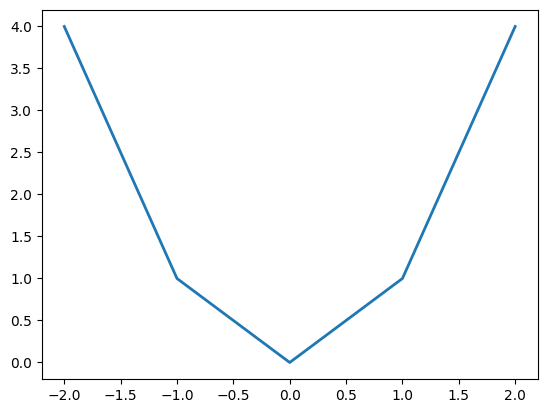

In [3]:
# specify points manually
toolz.pipe(
    vk.XyPoints(x=[-2, -1, 0, 1, 2], y=[4, 1, 0, 1, 4]),
    vk.plot_line,
)
plt.show()

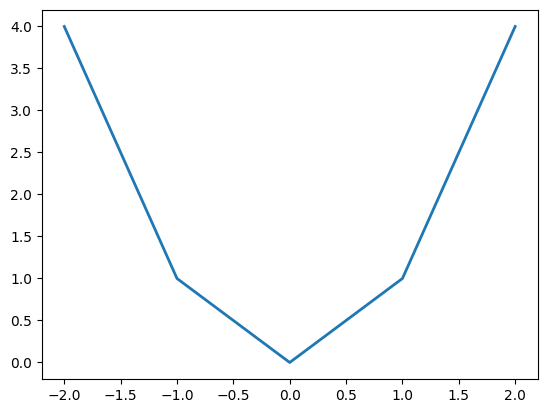

In [4]:
# specify function
toolz.pipe(
    vk.create_xy_points(ofk.sphere, [-2, -1, 0, 1, 2]),
    vk.plot_line,
)
plt.show()

## `FunctionPlotter`

### 1-vector input

In [5]:
func = lambda x: (x**2).sum()
bounds = [(-5, 5)]

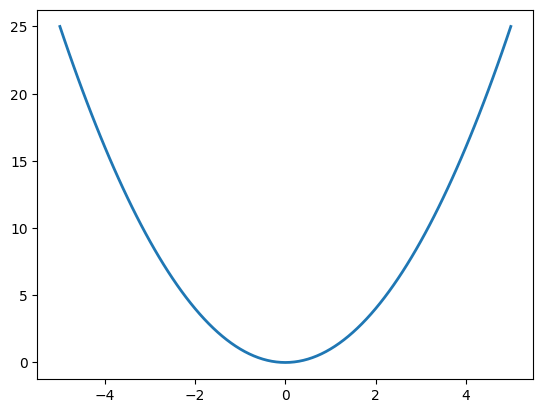

In [6]:
# default
vk.FunctionPlotter(func, bounds).plot()
plt.show()

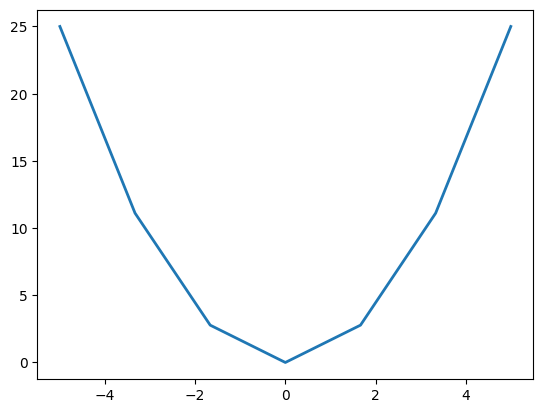

In [7]:
vk.FunctionPlotter(func, bounds, n_xvalues=7).plot()
plt.show()

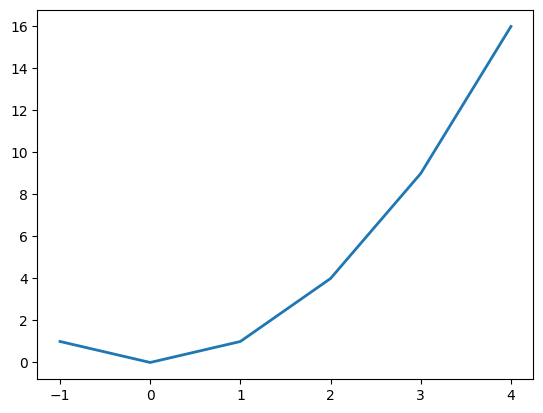

In [8]:
vk.FunctionPlotter(func, bounds, x1_values=[-1, 0, 1, 2, 3, 4]).plot()
plt.show()

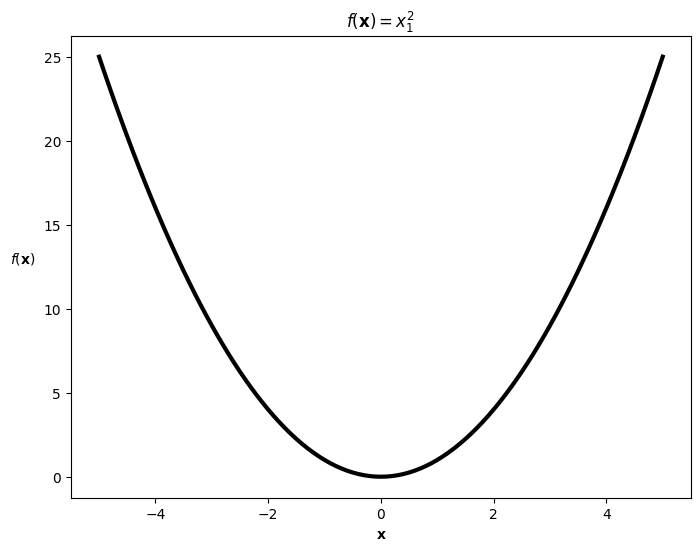

In [9]:
# customized
_, ax = plt.subplots(1, 1, figsize=(8, 6))

kws_plot = vk.Config.get_kws_plot__base()
kws_plot.update({"color": "black", "linewidth": 3})

plotter = vk.FunctionPlotter(func, bounds, kws_plot=kws_plot)
_, ax, _ = plotter.plot(ax=ax)

ax.set_xlabel(r"$ \mathbf{x} $")
ax.set_ylabel(r"$ f(\mathbf{x}) $", rotation=0, labelpad=15)
ax.set_title(r"$ f(\mathbf{x}) = x_{1}^{2} $")

plt.show()

### 2-vector input

In [10]:
func = lambda x: (x**2).sum()
bounds = [(-5, 5)] * 2

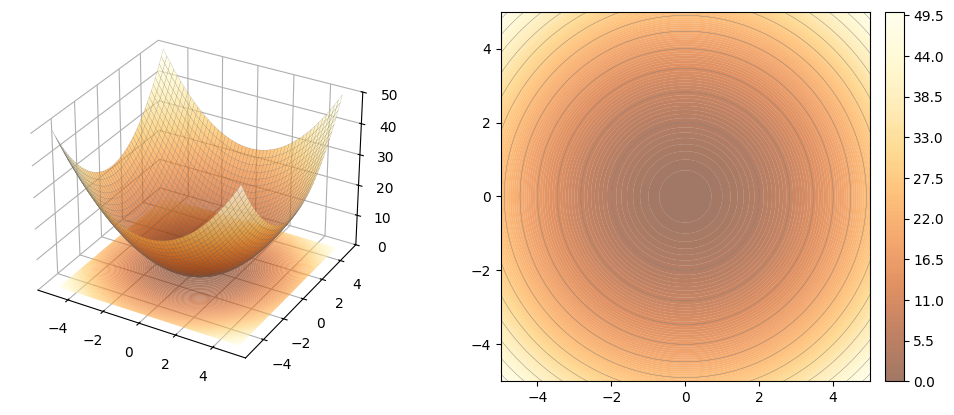

In [11]:
# default
vk.FunctionPlotter(func, bounds).plot()
plt.show()

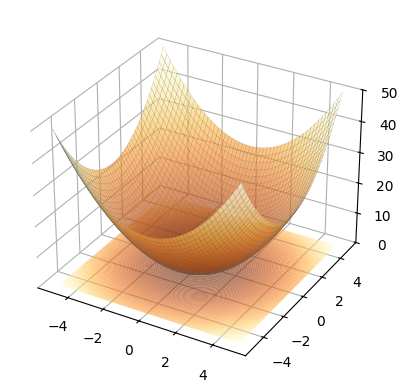

In [12]:
# show only the surface plot
vk.FunctionPlotter(func, bounds, with_contour=False).plot()
plt.show()

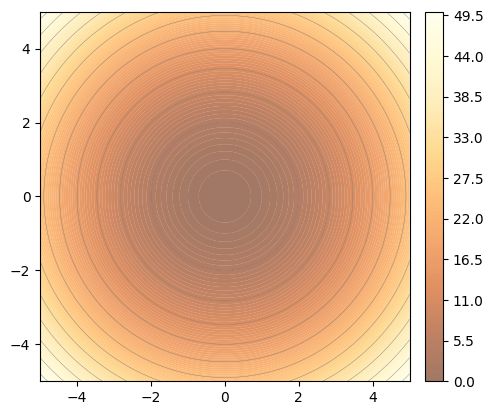

In [13]:
# show only the contour plot
vk.FunctionPlotter(func, bounds, with_surface=False).plot()
plt.show()

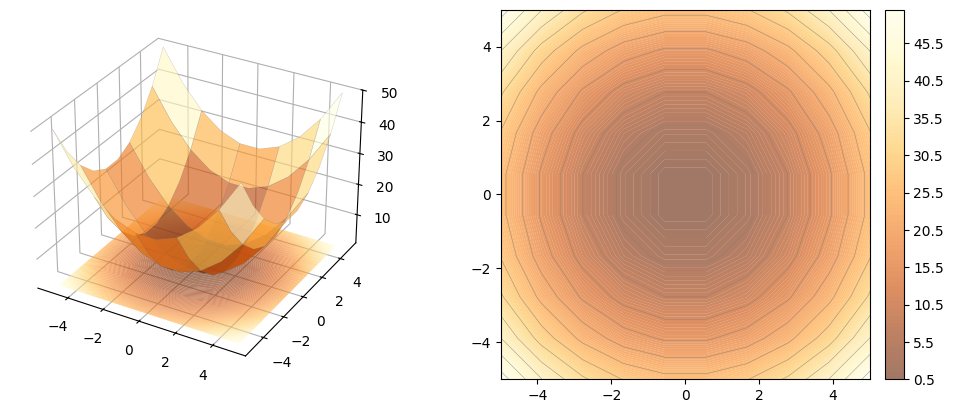

In [14]:
vk.FunctionPlotter(func, bounds, n_xvalues=10).plot()
plt.show()

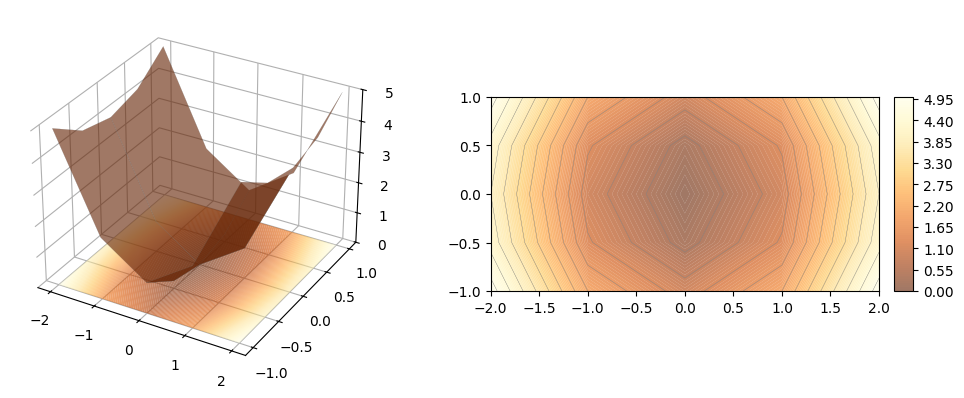

In [15]:
vk.FunctionPlotter(
    func,
    bounds,
    x1_values=[-2, -1, 0, 1, 2],
    x2_values=[-1, -0.5, 0, 0.5, 1],
).plot()
plt.show()

In [16]:
plt.colormaps()[::2][:5]

['magma', 'plasma', 'cividis', 'twilight_shifted', 'berlin']

#### With customization

Example 1

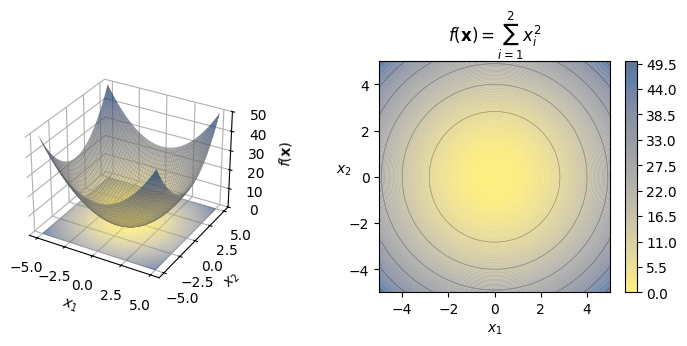

In [17]:
fig = plt.figure(figsize=(9, 3))

kws_surface = vk.Config.get_kws_surface__base()
kws_contourf = vk.Config.get_kws_contourf__base()
kws_contour = vk.Config.get_kws_contour__base()

kws_surface.update({"cmap": plt.get_cmap("cividis_r")})
kws_contourf.update({"cmap": plt.get_cmap("cividis_r")})
kws_contour.update({"colors": "black", "alpha": 0.4, "levels": 6, "linewidths": 0.414})

plotter = vk.FunctionPlotter(
    func,
    bounds,
    kws_surface=kws_surface,
    kws_contourf=kws_contourf,
    kws_contour=kws_contour,
)

_, ax, ax3d = plotter.plot(fig=fig)

ax.set_xlabel(r"$ x_{1} $")
ax.set_ylabel(r"$ x_{2} $", rotation=0)
ax.set_title(r"$ f(\mathbf{x}) = \sum_{i=1}^{2} x_i^2 $")

ax3d.set_xlabel(r"$ x_{1} $")
ax3d.set_ylabel(r"$ x_{2} $")
ax3d.set_zlabel(r"$ f(\mathbf{x}) $")

plt.show()

Example 2

In [18]:
add4 = pk.op(operator.add, 4)
dome = toolz.compose_left(ofk.sphere, ofk.negate, add4)
bounds = [(-3, 3), (-3, 3)]
optimum = [vk.Point(0, 0, 4)]

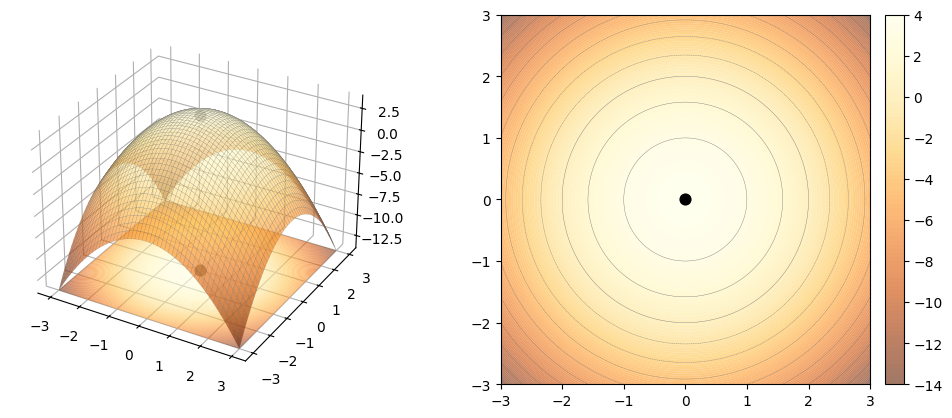

In [19]:
vk.FunctionPlotter(dome, bounds, points=optimum).plot()
plt.show()

Example 3

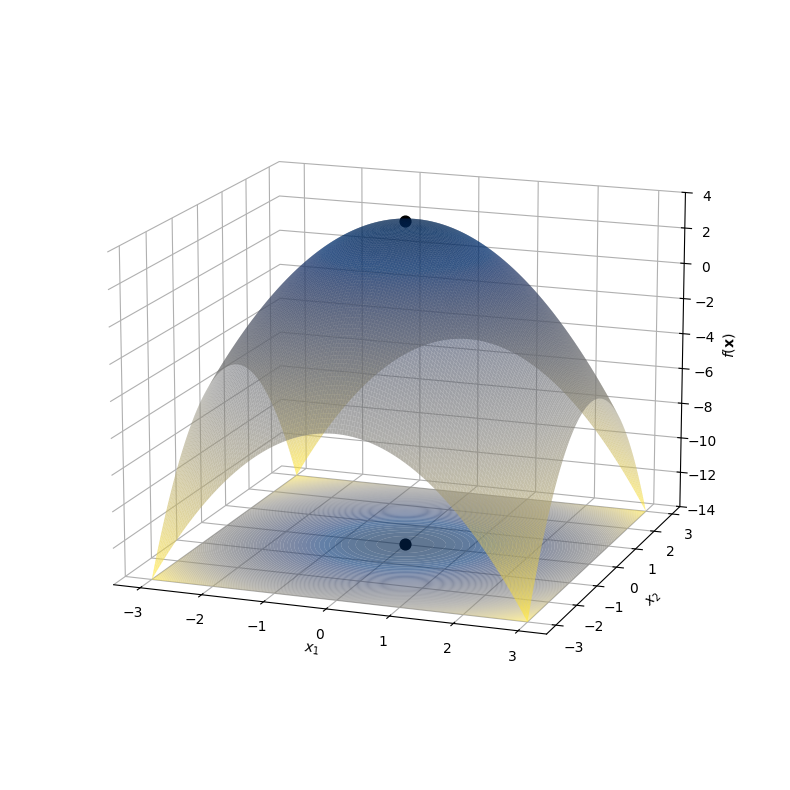

In [20]:
fig = plt.figure(figsize=(24, 10))

plotter = vk.FunctionPlotter(
    dome,
    bounds,
    with_contour=False,
    n_xvalues=303,
    points=optimum,
    kws_surface=dict(cmap=plt.get_cmap("cividis_r"), linewidth=0),
    kws_contourf=dict(cmap=plt.get_cmap("cividis_r")),
    kws_contour=dict(linewidths=0),
)
_, _, ax3d = plotter.plot(fig=fig)

ax3d.set_xlabel(r"$ x_{1} $")
ax3d.set_ylabel(r"$ x_{2} $")
ax3d.set_zlabel(r"$ f(\mathbf{x}) $")

ax3d.view_init(15, -70, 0)
ax3d.set_box_aspect(None, zoom=0.9)

plt.show()